In [13]:
%load_ext autoreload
%autoreload 2

#!/usr/bin/env python3
import os
import cv2
import numpy as np
from learnedmatcher import LearnedMatcher
from extract_sift import ExtractSIFT
import matplotlib.pyplot as plt

def draw_match(img1_path, img2_path, corr1, corr2):
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)

    corr1 = [cv2.KeyPoint(corr1[i, 0], corr1[i, 1], 1) for i in range(corr1.shape[0])]
    corr2 = [cv2.KeyPoint(corr2[i, 0], corr2[i, 1], 1) for i in range(corr2.shape[0])]

    assert len(corr1) == len(corr2)

    draw_matches = [cv2.DMatch(i, i, 0) for i in range(len(corr1))]

    display = cv2.drawMatches(img1, corr1, img2, corr2, draw_matches, None,
                              matchColor=(0, 255, 0),
                              singlePointColor=(0, 0, 255),
                              flags=4
                              )
    return display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


channels:128, layer_num:6
channels:128, layer_num:6
load model from C:\Users\romai\Documents\repositories\compareMatchingMethods\src\comparemethods\OANet-master\models\gl3d/sift-4000/model_best.pth


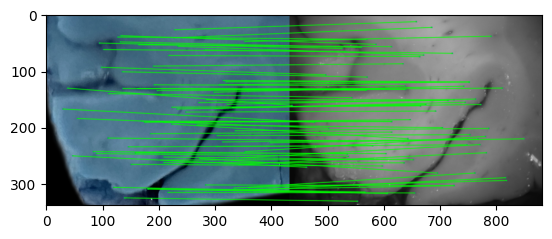

In [14]:
current_path = r'C:\Users\romai\Documents\repositories\compareMatchingMethods\src\comparemethods\OANet-master'
model_path = os.path.join(current_path, 'models', 'gl3d/sift-4000/model_best.pth')

#img1_name = r'C:\Users\romai\Documents\repositories\compareMatchingMethods\src\comparemethods\OANet-master\demo\test_img1.jpg'
# img2_name = r'C:\Users\romai\Documents\repositories\compareMatchingMethods\src\comparemethods\OANet-master\demo\test_img2.jpg'
img1_name = r'C:\Users\romai\Documents\repositories\compareMatchingMethods\notebooks\data\global_no_bg.png'
img2_name = r'C:\Users\romai\Documents\repositories\compareMatchingMethods\notebooks\data\moving.png'



detector = ExtractSIFT(8000)
lm = LearnedMatcher(model_path, inlier_threshold=1, use_ratio=0, use_mutual=0)
kpt1, desc1 = detector.run(img1_name)
kpt2, desc2 = detector.run(img2_name)

_, corr1, corr2 = lm.infer([kpt1, kpt2], [desc1, desc2])
display = draw_match(img1_name, img2_name, corr1, corr2)

plt.imshow(display)